# **Machine** **Learning** **Project**

Submitted by Sahith Kancharla

### Problem Statement: INN Hotels: Problem Statement

INN Hotels Group, a chain of hotels in Portugal, is facing significant financial and operational challenges due to a high rate of booking cancellations and no-shows. These cancellations often occur at the last minute, making it difficult to resell rooms and leading to substantial revenue losses, increased distribution costs, reduced profit margins from last-minute price cuts, and additional strain on human resources.

The growing influence of online booking channels has further complicated customer behavior, enabling easier cancellations and unpredictable booking patterns. The hotel group seeks a data-driven machine learning solution that can accurately predict the likelihood of booking cancellations in advance. This predictive capability will allow the company to implement targeted strategies such as dynamic pricing, optimized overbooking, and more effective cancellation and refund policies, ultimately reducing revenue loss and improving operational efficiency.

In [1]:
# Data Handling & Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import statsmodels.api as sm

# Preprocessing & Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
print(os.getcwd())

/Users/sahithkancharla


In [ ]:
data = pd.read_csv("INNHotelsGroup.csv")

In [3]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
# Checking the first 5 row data
print(data.head())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [5]:
# Checking the last 5 row data
print(data.tail())

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018     

In [6]:
#Check the shape (rows, columns)
print("Shape of the data:", data.shape)

Shape of the data: (36275, 19)


In [7]:
# Summary statistics (numerical columns)
print(data.describe())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     8

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
# List column names
print("Columns:", data.columns)
len(data.columns)

Columns: Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


19

In [10]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [11]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [12]:
data.describe().round(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00
mean,1.84,0.11,0.81,2.20,0.03,85.23,2017.82,7.42,15.60,0.03,0.02,0.15,103.42,0.62
std,0.52,0.40,0.87,1.41,0.17,85.93,0.38,3.07,8.74,0.16,0.37,1.75,35.09,0.79
min,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,17.00,2018.00,5.00,8.00,0.00,0.00,0.00,80.30,0.00
50%,2.00,0.00,1.00,2.00,0.00,57.00,2018.00,8.00,16.00,0.00,0.00,0.00,99.45,0.00
75%,2.00,0.00,2.00,3.00,0.00,126.00,2018.00,10.00,23.00,0.00,0.00,0.00,120.00,1.00
max,4.00,10.00,7.00,17.00,1.00,443.00,2018.00,12.00,31.00,1.00,13.00,58.00,540.00,5.00


In [13]:
data.duplicated().sum()

np.int64(0)

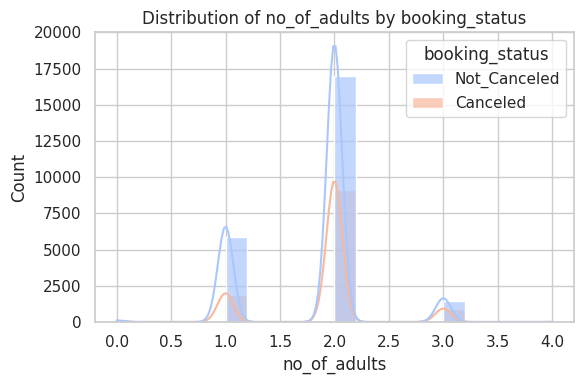

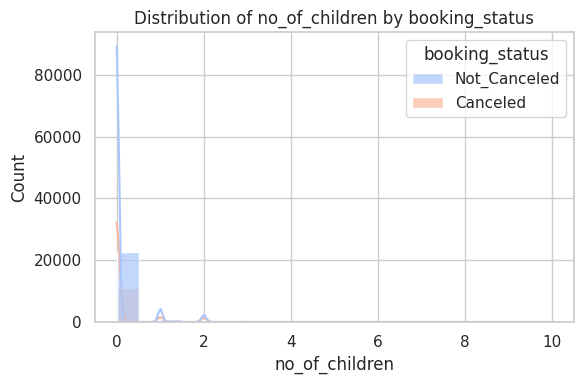

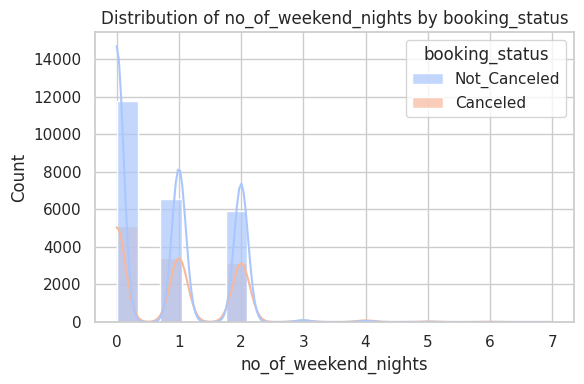

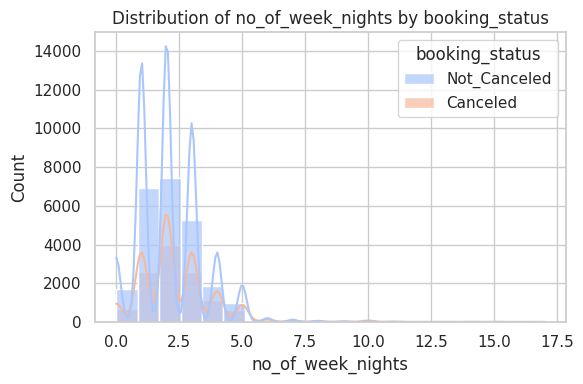

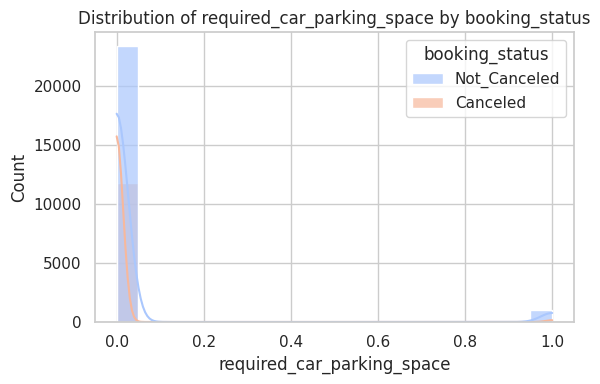

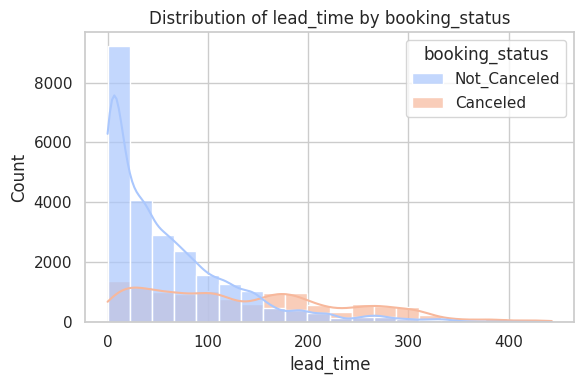

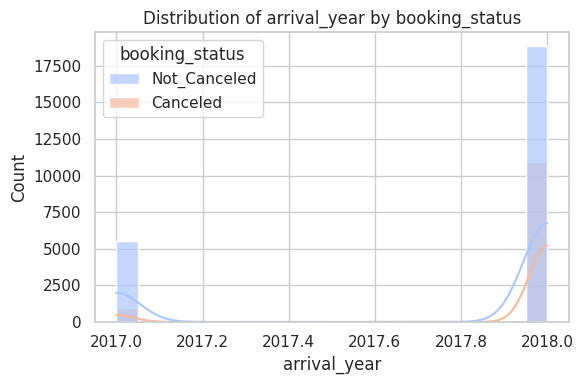

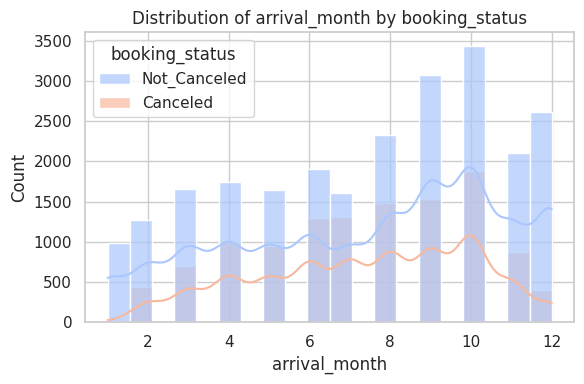

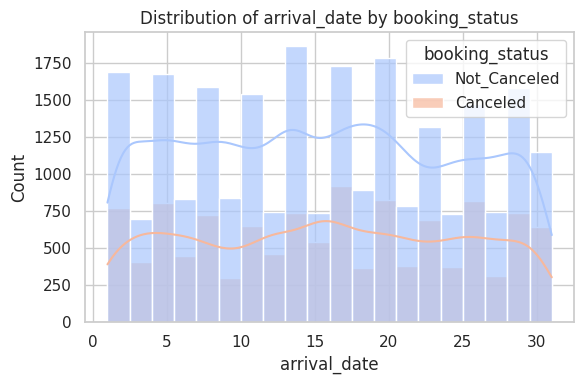

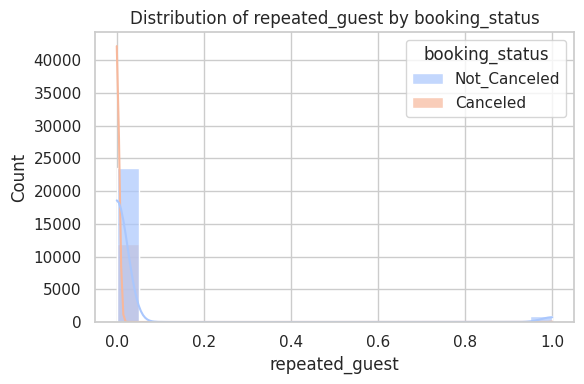

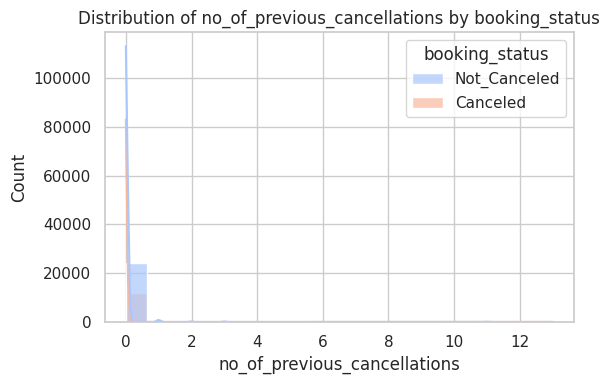

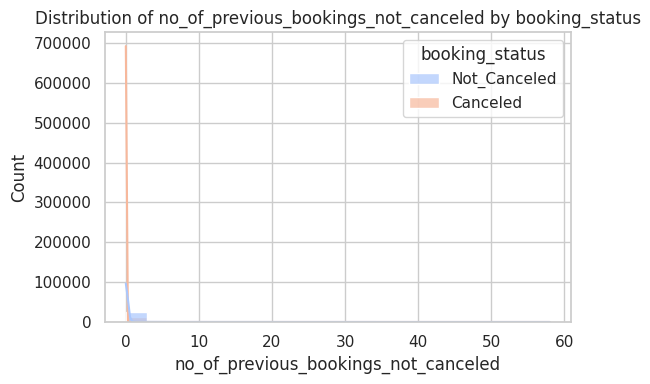

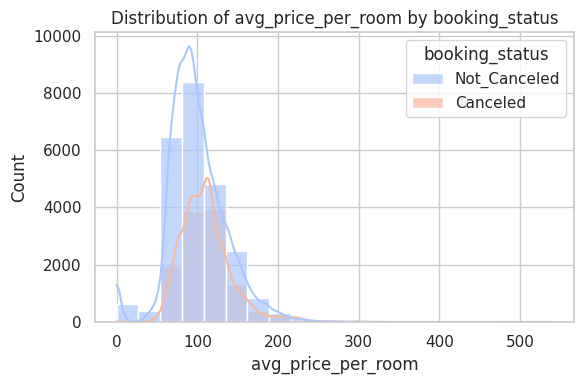

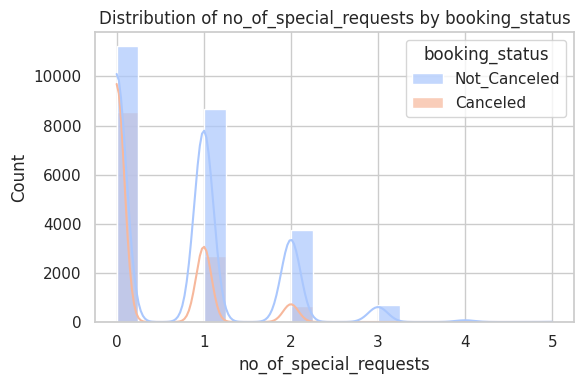

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Hue variable
hue_var = "booking_status"

# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms with hue
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data=data,
        x=col,
        hue=hue_var,
        kde=True,
        bins=20,
        palette="coolwarm",
        alpha=0.7
    )
    plt.title(f"Distribution of {col} by {hue_var}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

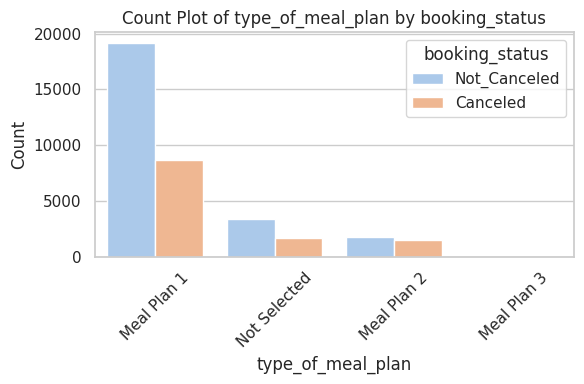

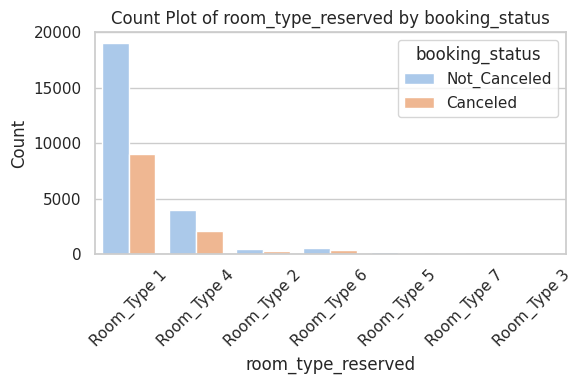

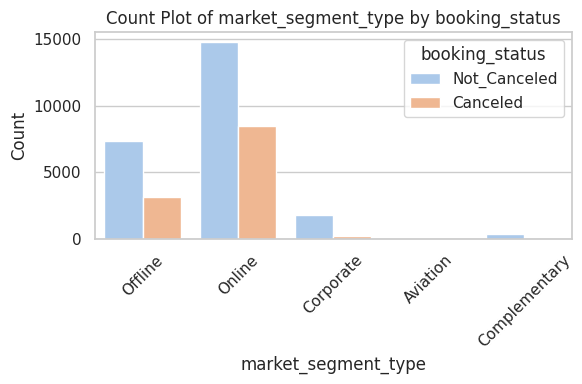

In [15]:
# Select categorical columns (excluding ID and hue variable)
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col not in ["Booking_ID", hue_var]]

# Plot countplots with hue
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(
        data=data,
        x=col,
        hue=hue_var,
        palette="pastel"
    )
    plt.title(f"Count Plot of {col} by {hue_var}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Lead Time: Canceled bookings have a much higher average lead time (139 days) compared to non-canceled bookings (59 days), indicating longer lead times are more prone to cancellation.

Number of Adults: Canceled bookings tend to have slightly more adults (1.91) compared to non-canceled (1.81).

Number of Children: Slightly higher in canceled bookings (0.12) than in non-canceled (0.10).

Stay Duration: Canceled bookings have longer average stays, both for weekend nights (0.89 vs 0.77) and week nights (2.39 vs 2.11).

Car Parking Space: Non-canceled bookings request car parking more often (0.04 vs 0.01), possibly indicating higher commitment.

Repeat Guests: More common among non-canceled bookings (0.04 vs 0.00).

Previous Booking Behavior: Non-canceled bookings have more previous successful bookings (0.23 vs 0.00), while both have low previous cancellations.

Average Price per Room: Higher for canceled bookings (110.59) compared to non-canceled (99.93).

Special Requests: Non-canceled bookings make more special requests (0.76 vs 0.33), indicating stronger intent to stay.

Meal Plan, Room Type, and Market Segment: Both canceled and non-canceled bookings share the most common categories — Meal Plan 1, Room_Type 1, and Online segment.

### Percentage of Booking Cancellations

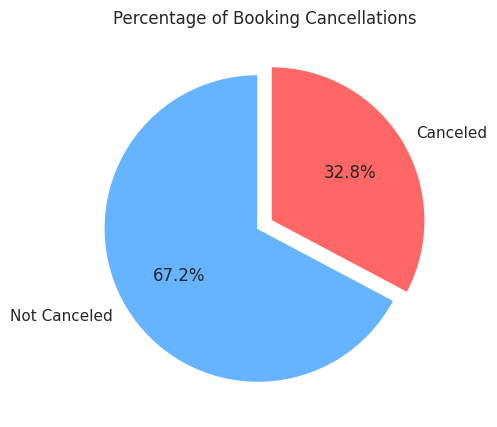

In [16]:
import matplotlib.pyplot as plt

# Target variable distribution
status_counts = data['booking_status'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    status_counts,
    labels=['Not Canceled', 'Canceled'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff6666'],
    startangle=90,
    explode=(0.05, 0.05)
)
plt.title("Percentage of Booking Cancellations")
plt.show()

### Market Segment vs Cancellation

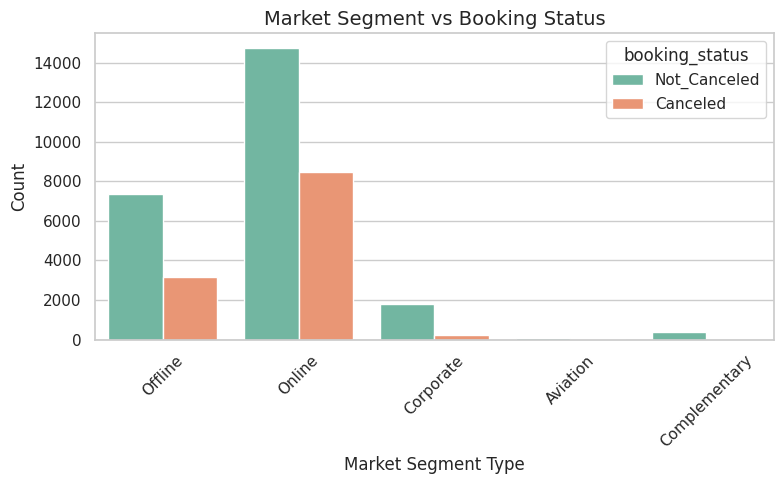

In [17]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(
    data=data,
    x='market_segment_type',
    hue='booking_status',
    palette='Set2'
)
plt.title("Market Segment vs Booking Status", fontsize=14)
plt.xlabel("Market Segment Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bivariate Analysis

### Numerical Features

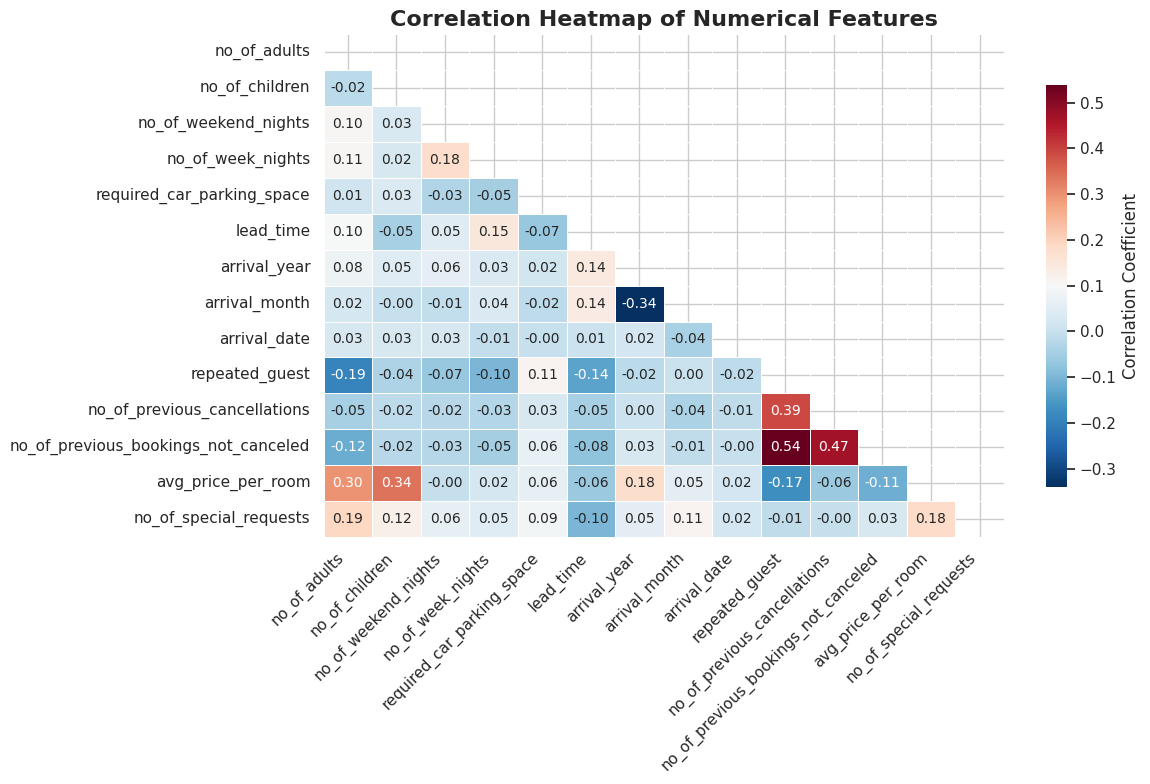

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Only numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_data.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='RdBu_r',       # Diverging colormap
    fmt=".2f",
    annot_kws={"size": 10},  # Annotation font size
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Price vs Booking Status

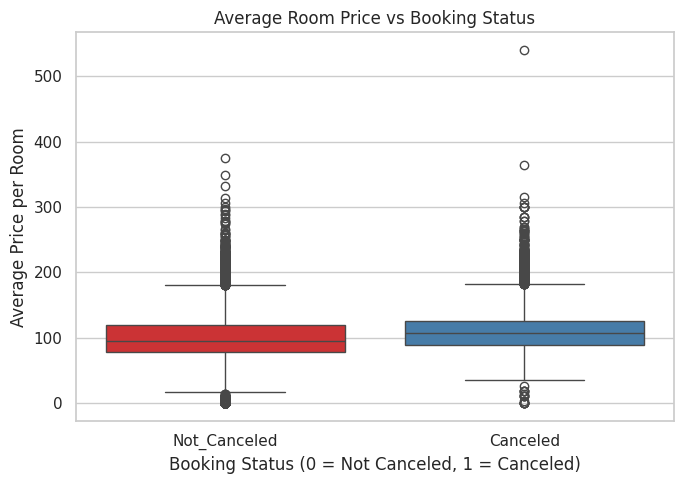

In [19]:
plt.figure(figsize=(7, 5))
sns.boxplot(
    data=data,
    x='booking_status',
    y='avg_price_per_room',
    palette='Set1'
)
plt.title("Average Room Price vs Booking Status")
plt.xlabel("Booking Status (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Average Price per Room")
plt.tight_layout()
plt.show()

1.1 What are the busiest months in the hotel?


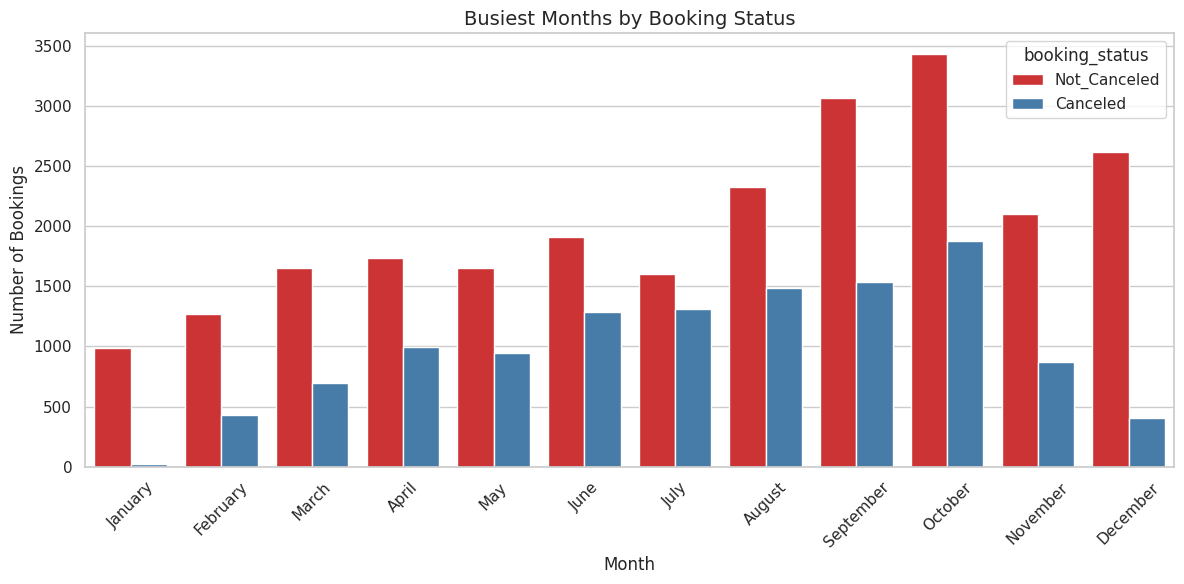

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Map month numbers to month names
month_map = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

# Convert month numbers to month names
if data["arrival_month"].dtype != "O":
    data["arrival_month"] = data["arrival_month"].map(month_map)

# Ensure months appear in correct order
month_order = list(month_map.values())

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x="arrival_month",
    hue="booking_status",
    palette="Set1",  # Bright colors
    order=month_order
)

plt.title("Busiest Months by Booking Status", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.2 Which market segment do most of the guests come from?



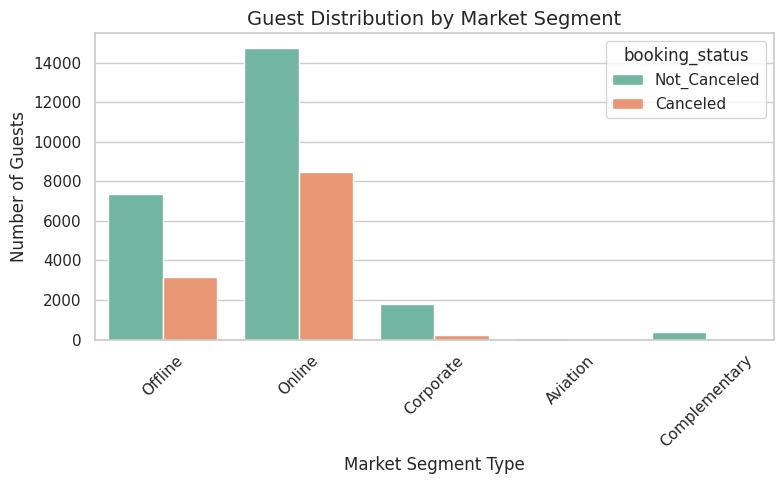

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Count plot for market segment type with hue
plt.figure(figsize=(8, 5))
sns.countplot(
    data=data,
    x="market_segment_type",
    hue="booking_status",
    palette="Set2"  # Bright and clear colors
)

plt.title("Guest Distribution by Market Segment", fontsize=14)
plt.xlabel("Market Segment Type")
plt.ylabel("Number of Guests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 1.3 Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

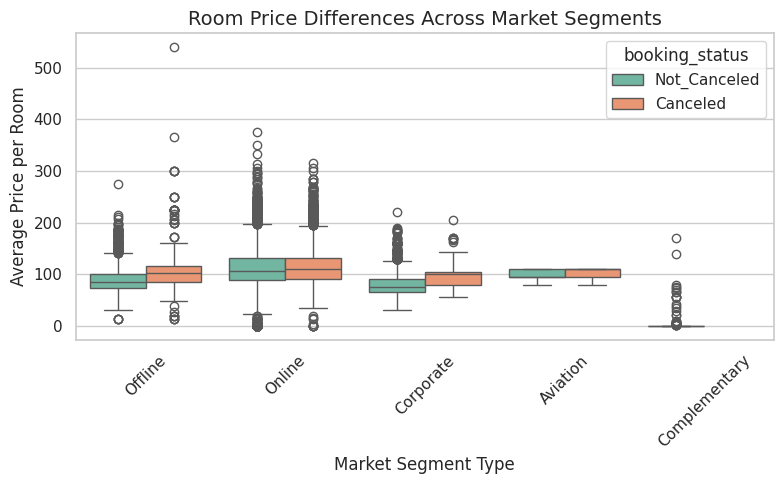

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Boxplot for room price differences across market segments
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data,
    x="market_segment_type",
    y="avg_price_per_room",
    hue="booking_status",
    palette="Set2"  # Bright colors for better contrast
)

plt.title("Room Price Differences Across Market Segments", fontsize=14)
plt.xlabel("Market Segment Type")
plt.ylabel("Average Price per Room")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

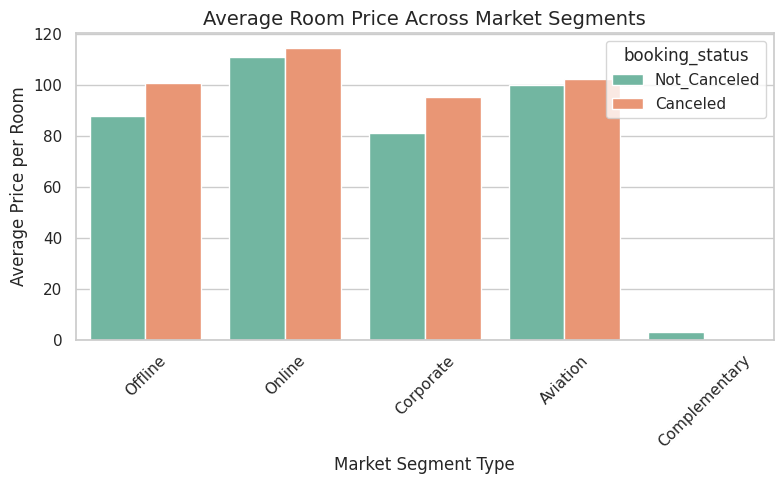

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Bar plot for average room price by market segment and booking status
plt.figure(figsize=(8, 5))
sns.barplot(
    data=data,
    x="market_segment_type",
    y="avg_price_per_room",
    hue="booking_status",
    palette="Set2",  # Bright colors
    ci=None  # Remove confidence intervals for cleaner look
)

plt.title("Average Room Price Across Market Segments", fontsize=14)
plt.xlabel("Market Segment Type")
plt.ylabel("Average Price per Room")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.4 What percentage of bookings are canceled?

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64


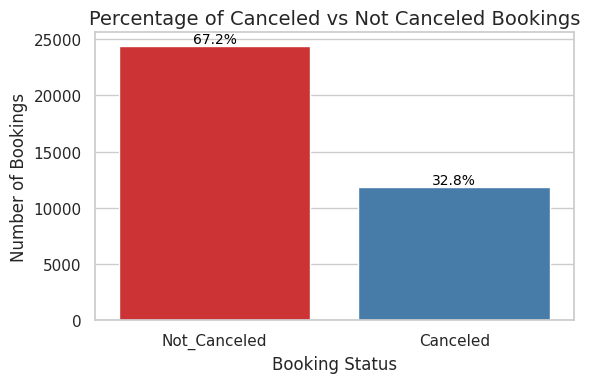

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Calculate percentage of cancellations
cancel_counts = data['booking_status'].value_counts(normalize=True) * 100
print(cancel_counts)

# Bar plot for cancellation percentage
plt.figure(figsize=(6, 4))
sns.countplot(
    data=data,
    x="booking_status",
    palette="Set1"  # Bright colors
)

# Add percentage labels
total = len(data)
for p in plt.gca().patches:
    count = p.get_height()
    percentage = f"{100 * count / total:.1f}%"
    plt.gca().annotate(
        percentage,
        (p.get_x() + p.get_width() / 2., count),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.title("Percentage of Canceled vs Not Canceled Bookings", fontsize=14)
plt.xlabel("Booking Status")
plt.ylabel("Number of Bookings")
plt.tight_layout()
plt.show()

1.5 Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status
Not_Canceled    98.27957
Canceled         1.72043
Name: proportion, dtype: float64


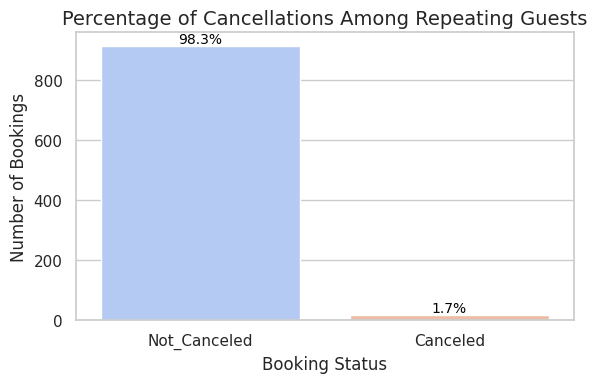

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Filter only repeating guests
repeating_guests = data[data['repeated_guest'] == 1]

# Calculate percentage of cancellations among repeating guests
repeat_cancel_counts = repeating_guests['booking_status'].value_counts(normalize=True) * 100
print(repeat_cancel_counts)

# Bar plot with hue colors
plt.figure(figsize=(6, 4))
sns.countplot(
    data=repeating_guests,
    x="booking_status",
    palette="coolwarm"
)

# Add percentage labels
total = len(repeating_guests)
for p in plt.gca().patches:
    count = p.get_height()
    percentage = f"{100 * count / total:.1f}%"
    plt.gca().annotate(
        percentage,
        (p.get_x() + p.get_width() / 2., count),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.title("Percentage of Cancellations Among Repeating Guests", fontsize=14)
plt.xlabel("Booking Status")
plt.ylabel("Number of Bookings")
plt.tight_layout()
plt.show()

1.6 Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

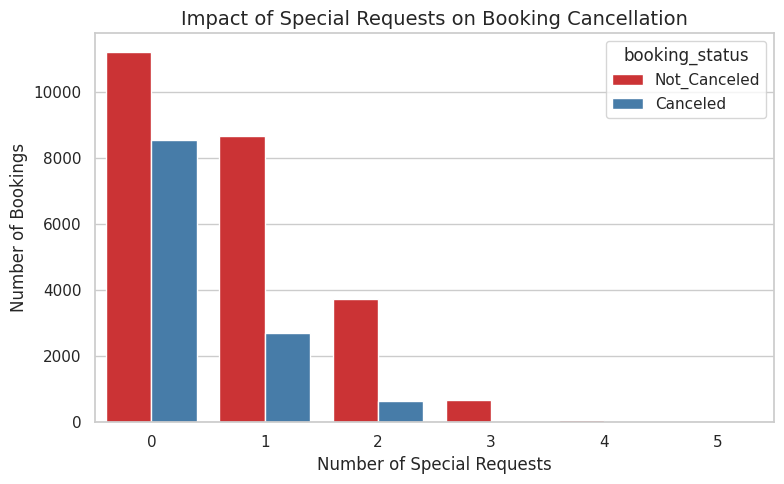

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: Number of special requests vs booking status
plt.figure(figsize=(8, 5))
sns.countplot(
    data=data,
    x="no_of_special_requests",
    hue="booking_status",
    palette="Set1"  # Bright colors
)

plt.title("Impact of Special Requests on Booking Cancellation", fontsize=14)
plt.xlabel("Number of Special Requests")
plt.ylabel("Number of Bookings")
plt.tight_layout()
plt.show()

### Duplicate value Check

In [27]:
print("Duplicate values:",data.duplicated().sum())

Duplicate values: 0


### Missing Value Treatment

In [28]:
# 1. Missing Value Treatment
print("Missing Values:\n", data.isnull().sum())

# Fill missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype in ['int64', 'float64']:
            median_val = data[col].median()
            data[col].fillna(median_val, inplace=True)
            print(f"Filled numerical {col} with median ({median_val})")
        else:
            mode_val = data[col].mode()[0]
            data[col].fillna(mode_val, inplace=True)
            print(f"Filled categorical {col} with mode ({mode_val})")

Missing Values:
 Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


### Outlier Detection & Treatment

In [29]:
import numpy as np

# 2. Outlier Detection and Treatment (IQR Method)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    if not outliers.empty:
        print(f"{col}: {len(outliers)} outliers detected.")
        # Cap outliers
        data[col] = np.where(data[col] < lower_limit, lower_limit, data[col])
        data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

no_of_adults: 10167 outliers detected.
no_of_children: 2698 outliers detected.
no_of_weekend_nights: 21 outliers detected.
no_of_week_nights: 324 outliers detected.
required_car_parking_space: 1124 outliers detected.
lead_time: 1331 outliers detected.
arrival_year: 6514 outliers detected.
repeated_guest: 930 outliers detected.
no_of_previous_cancellations: 338 outliers detected.
no_of_previous_bookings_not_canceled: 812 outliers detected.
avg_price_per_room: 1696 outliers detected.
no_of_special_requests: 761 outliers detected.


In [30]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("INNHotelsGroup.csv")

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Function to treat outliers using IQR capping
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap values
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    return df

# Apply capping for all numeric columns
for col in numeric_cols:
    data = cap_outliers_iqr(data, col)

print("✅ Outliers handled using IQR capping for all numeric columns.")
print(data.describe())

✅ Outliers handled using IQR capping for all numeric columns.
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count       36275.0         36275.0          36275.000000       36275.000000   
mean            2.0             0.0              0.810117           2.177836   
std             0.0             0.0              0.867339           1.290622   
min             2.0             0.0              0.000000           0.000000   
25%             2.0             0.0              0.000000           1.000000   
50%             2.0             0.0              1.000000           2.000000   
75%             2.0             0.0              2.000000           3.000000   
max             2.0             0.0              5.000000           6.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                     36275.0  36275.000000       36275.0   36275.000000   
mean                          0.0     83.761751        20

### Feature Engineering

In [31]:
# 3. Feature Engineering
# Total nights
data['total_nights'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

# Long stay flag
data['is_long_stay'] = np.where(data['total_nights'] > 7, 1, 0)

# Binary encoding for booking status
data['booking_status'] = np.where(data['booking_status'] == 'Canceled', 1, 0)

print("New features added: total_nights, is_long_stay")

New features added: total_nights, is_long_stay


In [32]:

# Drop the Booking_ID and other columns not needed for the model
# We also drop the original components of total_nights to avoid multicollinearity
data = data.drop(columns=['Booking_ID', 'no_of_weekend_nights', 'no_of_week_nights'])

# Identify categorical and continuous features
categorical_features = [
    'type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
    'arrival_year', 'arrival_month', 'arrival_date'
]
continuous_features = [
    'no_of_adults', 'no_of_children', 'required_car_parking_space',
    'lead_time', 'repeated_guest', 'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
    'no_of_special_requests', 'total_nights', 'is_long_stay'
]

# One-hot encode the categorical features
data = pd.get_dummies(data, columns=categorical_features, drop_first=True, dtype=int)

Train-Test Split

In [34]:

# Define the target variable (y) and the features (X)
y = data['booking_status']
X = data.drop('booking_status', axis=1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Data split into training and testing sets.
Train set: (29020, 65)
Test set: (7255, 65)


In [35]:
# 4. Data Scaling

# Find the continuous features in the one-hot encoded dataset
continuous_features_in_X = [col for col in X_train.columns if col in continuous_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train[continuous_features_in_X] = scaler.fit_transform(X_train[continuous_features_in_X])
X_test[continuous_features_in_X] = scaler.transform(X_test[continuous_features_in_X])

print("Continuous features have been scaled.")


Continuous features have been scaled.


# Model Building

Logistic Regression (statsmodels)

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Load the dataset from the uploaded file
try:
    data = pd.read_csv('INNHotelsGroup.csv')
except FileNotFoundError:
    print("Error: The file 'INNHotelsGroup.csv' was not found.")
    print("Please make sure the CSV file is in the same directory as the script.")
    exit()

# --- 1. Feature Engineering (as requested) ---

# Create 'total_nights' by summing weekend and week nights
data['total_nights'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

# Create 'is_long_stay' flag based on total_nights
data['is_long_stay'] = np.where(data['total_nights'] > 7, 1, 0)

# Binary encode 'booking_status' (Canceled = 1, Not_Canceled = 0)
data['booking_status'] = np.where(data['booking_status'] == 'Canceled', 1, 0)

# --- 2. Further Feature Engineering (for categorical variables) ---

# Drop the Booking_ID and other columns not needed for the model
# We also drop the original components of total_nights to avoid multicollinearity
data = data.drop(columns=['Booking_ID', 'no_of_weekend_nights', 'no_of_week_nights'])

# Identify categorical and continuous features
categorical_features = [
    'type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
    'arrival_year', 'arrival_month', 'arrival_date'
]
continuous_features = [
    'no_of_adults', 'no_of_children', 'required_car_parking_space',
    'lead_time', 'repeated_guest', 'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
    'no_of_special_requests', 'total_nights', 'is_long_stay'
]

# One-hot encode the categorical features
data = pd.get_dummies(data, columns=categorical_features, drop_first=True, dtype=int)

# --- 3. Train-Test Split ---

# Define the target variable (y) and the features (X)
y = data['booking_status']
X = data.drop('booking_status', axis=1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")

# --- 4. Scaling (for continuous features) ---

# Find the continuous features in the one-hot encoded dataset
continuous_features_in_X = [col for col in X_train.columns if col in continuous_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train[continuous_features_in_X] = scaler.fit_transform(X_train[continuous_features_in_X])
X_test[continuous_features_in_X] = scaler.transform(X_test[continuous_features_in_X])

print("Continuous features have been scaled.")

# --- 5. Logistic Regression using statsmodels ---

# Add a constant (intercept) to the training data
X_train_sm = sm.add_constant(X_train)

# Create and fit the logistic regression model
print("Fitting the logistic regression model...")
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the model summary
print("\n--- Model Summary ---")
print(result.summary())



Data split into training and testing sets.
Continuous features have been scaled.
Fitting the logistic regression model...
         Current function value: 0.410616
         Iterations: 35

--- Model Summary ---
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28953
Method:                           MLE   Df Model:                           66
Date:                Sun, 31 Aug 2025   Pseudo R-squ.:                  0.3508
Time:                        05:59:37   Log-Likelihood:                -11916.
converged:                      False   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

In [21]:
# --- 6. Model Evaluation ---

# Make predictions on the test set
X_test_sm = sm.add_constant(X_test)
y_pred_proba = result.predict(X_test_sm)
y_pred = (y_pred_proba > 0.5).astype(int) # Convert probabilities to binary predictions

print("\n--- Evaluation on Test Data ---")
print("Accuracy",accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Evaluation on Test Data ---
Accuracy 0.8181943487250173
Confusion Matrix:
[[4388  490]
 [ 829 1548]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4878
           1       0.76      0.65      0.70      2377

    accuracy                           0.82      7255
   macro avg       0.80      0.78      0.79      7255
weighted avg       0.81      0.82      0.81      7255



### Calculating VIF score

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\n--- Initial VIF Scores ---")

print(vif_data.sort_values(by='VIF', ascending=False))


--- Initial VIF Scores ---
                           feature        VIF
23      market_segment_type_Online  42.132827
22     market_segment_type_Offline  19.841858
24               arrival_year_2018   8.326634
33                arrival_month_10   6.319453
32                 arrival_month_9   5.734073
..                             ...        ...
14  room_type_reserved_Room_Type 2   1.119448
2       required_car_parking_space   1.046014
17  room_type_reserved_Room_Type 5   1.039942
12   type_of_meal_plan_Meal Plan 3   1.022567
15  room_type_reserved_Room_Type 3   1.001760

[66 rows x 2 columns]


In [23]:

# Remove variables with high VIF (e.g., VIF > 10)
high_vif_columns = vif_data[vif_data["VIF"] > 10]["feature"]
X_train = X_train.drop(columns=high_vif_columns)
X_test = X_test.drop(columns=high_vif_columns)

print(f"Removed variables with high VIF: {high_vif_columns}")

Removed variables with high VIF: 22    market_segment_type_Offline
23     market_segment_type_Online
Name: feature, dtype: object


In [24]:
# --- 5. Logistic Regression ---
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# --- 6. Remove High p-Value Variables ---
high_p_value_columns = result.pvalues[result.pvalues > 0.05].index

# Ensure high p-value columns are still present in the dataset
high_p_value_columns = [col for col in high_p_value_columns if col in X_train.columns]
print("Columns removed due to high p-values (>0.05):")
print(high_p_value_columns)
# Remove columns with high p-values from X_train and X_test
X_train = X_train.drop(columns=high_p_value_columns)
X_test = X_test.drop(columns=high_p_value_columns)


# Refit the model after removing high p-value columns
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())


         Current function value: 0.435529
         Iterations: 35
Columns removed due to high p-values (>0.05):
['no_of_previous_bookings_not_canceled', 'type_of_meal_plan_Meal Plan 3', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'arrival_date_4', 'arrival_date_10', 'arrival_date_11', 'arrival_date_12', 'arrival_date_15', 'arrival_date_16', 'arrival_date_18', 'arrival_date_19', 'arrival_date_20', 'arrival_date_25', 'arrival_date_26', 'arrival_date_27', 'arrival_date_28', 'arrival_date_30', 'arrival_date_31']
Optimization terminated successfully.
         Current function value: 0.436410
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28977
Method:            

In [25]:
from sklearn.metrics import roc_curve, auc,accuracy_score

# Get predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f"Area Under ROC Curve (AUC): {roc_auc}")

# Find the optimal threshold based on the closest point to (0, 1) on the ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba > optimal_threshold).astype(int)

# Evaluate the model with the new threshold
print("\n--- Evaluation with Optimal Threshold ---")
print("Accuracy",accuracy_score(y_test, y_pred_optimal))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimal))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))


Area Under ROC Curve (AUC): 0.8801140335761792
Optimal Threshold: 0.27882153870582377

--- Evaluation with Optimal Threshold ---
Accuracy 0.7791867677463818
Confusion Matrix:
[[3669 1209]
 [ 393 1984]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      4878
           1       0.62      0.83      0.71      2377

    accuracy                           0.78      7255
   macro avg       0.76      0.79      0.77      7255
weighted avg       0.81      0.78      0.79      7255



### Decision Tree Classifier (sklearn)

In [50]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

target='booking_status'

# Drop non-predictive columns (e.g., Booking_ID, and the target column)
X = data.drop(columns=[target, 'Booking_ID'])

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

y = data[target]

# Train-Test Split (without scaling for Decision Tree)
X_train, X_test, y_train, y_test = train_test_split(
    X, data[target], test_size=0.2, random_state=42
)

# Decision Tree Model
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)
dt_model.fit(X_train, y_train)
# print(f"Tree depth: {dt_model.get_depth()}")
# print(f"Number of leaves: {dt_model.get_n_leaves()}")


DecisionTreeClassifier(max_depth=5, random_state=42)

In [51]:
print(f"Tree depth: {dt_model.get_depth()}")
print(f"Number of leaves: {dt_model.get_n_leaves()}")

Tree depth: 5
Number of leaves: 29


Feature Importance:
no_of_adults: 0.0246
no_of_children: 0.0000
no_of_weekend_nights: 0.0096
no_of_week_nights: 0.0020
required_car_parking_space: 0.0000
lead_time: 0.4847
arrival_year: 0.0000
arrival_month: 0.0196
arrival_date: 0.0006
repeated_guest: 0.0000
no_of_previous_cancellations: 0.0000
no_of_previous_bookings_not_canceled: 0.0000
avg_price_per_room: 0.1182
no_of_special_requests: 0.1417
type_of_meal_plan_Meal Plan 2: 0.0000
type_of_meal_plan_Meal Plan 3: 0.0000
type_of_meal_plan_Not Selected: 0.0000
room_type_reserved_Room_Type 2: 0.0000
room_type_reserved_Room_Type 3: 0.0000
room_type_reserved_Room_Type 4: 0.0000
room_type_reserved_Room_Type 5: 0.0000
room_type_reserved_Room_Type 6: 0.0000
room_type_reserved_Room_Type 7: 0.0000
market_segment_type_Complementary: 0.0000
market_segment_type_Corporate: 0.0000
market_segment_type_Offline: 0.0000
market_segment_type_Online: 0.1990


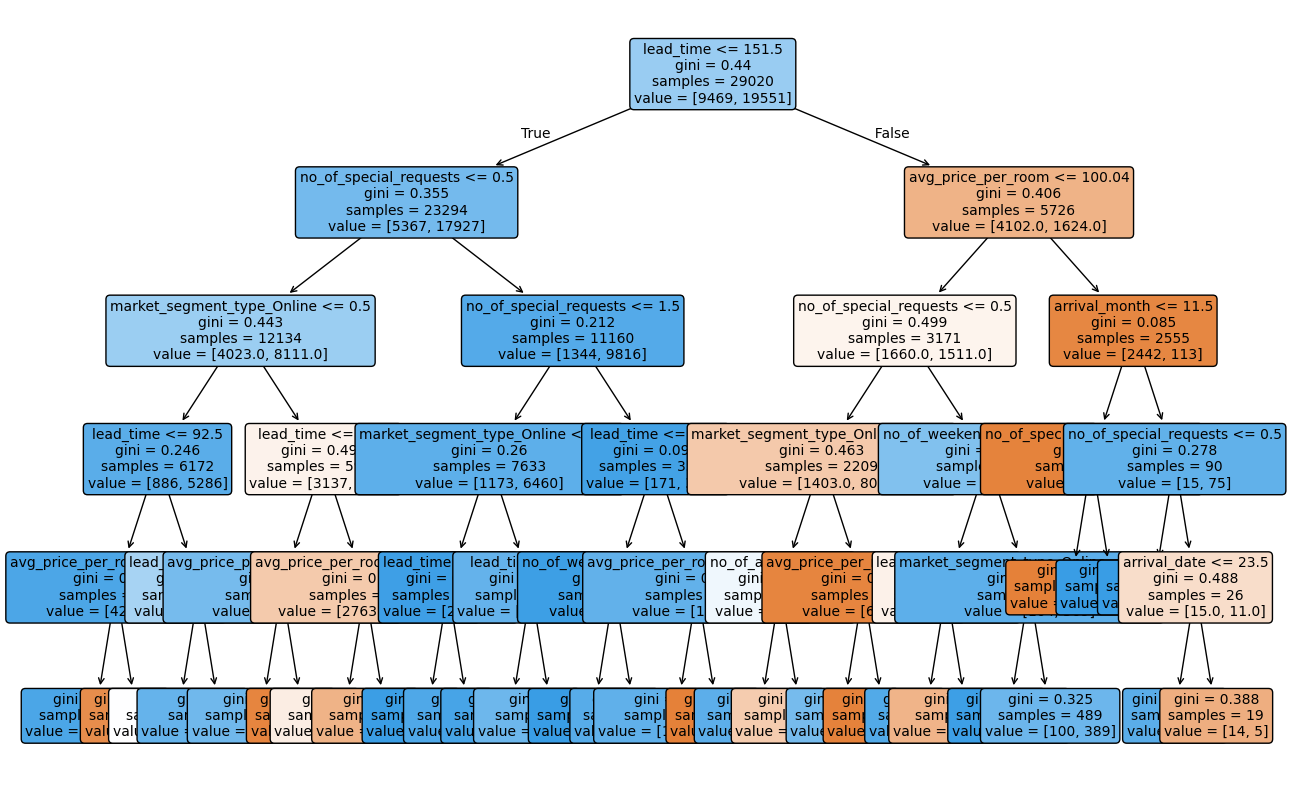

In [37]:

# Feature Importances
print("Feature Importance:")
for feature, importance in zip(X.columns, dt_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

In [38]:
# Predictions
y_pred_dt = dt_model.predict(X_test)

In [39]:
y_pred_dt

array(['Not_Canceled', 'Not_Canceled', 'Not_Canceled', ...,
       'Not_Canceled', 'Not_Canceled', 'Not_Canceled'], dtype=object)

In [40]:
# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8322536181943487

Confusion Matrix:
 [[1686  730]
 [ 487 4352]]

Classification Report:
               precision    recall  f1-score   support

    Canceled       0.78      0.70      0.73      2416
Not_Canceled       0.86      0.90      0.88      4839

    accuracy                           0.83      7255
   macro avg       0.82      0.80      0.81      7255
weighted avg       0.83      0.83      0.83      7255



### Improving the model performance by pre-pruning

In [41]:
# Pre-pruning with adjusted parameters
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,              # Limiting tree depth to prevent overfitting
    min_samples_split=10,     # At least 10 samples required to split
    min_samples_leaf=5,       # At least 5 samples required at leaf
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [42]:
y_pred_dt = dt_model.predict(X_test)

In [43]:
print("Pre-pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\n Pre-Pruned Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nPre-Pruned Classification Report:\n", classification_report(y_test, y_pred_dt))

Pre-pruned Decision Tree Accuracy: 0.847829083390765

 Pre-Pruned Confusion Matrix:
 [[1730  686]
 [ 418 4421]]

Pre-Pruned Classification Report:
               precision    recall  f1-score   support

    Canceled       0.81      0.72      0.76      2416
Not_Canceled       0.87      0.91      0.89      4839

    accuracy                           0.85      7255
   macro avg       0.84      0.81      0.82      7255
weighted avg       0.85      0.85      0.85      7255



### Improving the model performance by post-pruning

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Pre-prune the tree first
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,              # Pre-prune the tree depth
    min_samples_split=10,     # Pre-prune min samples split
    min_samples_leaf=5,       # Pre-prune min samples at leaf
    random_state=42
)

# Fit the pre-pruned model
dt_model.fit(X_train, y_train)

# Post-pruning with a chosen alpha value
# Let's pick an alpha value (e.g., 0.01 for moderate pruning)
ccp_alpha = 0  # Chosen alpha for post-pruning

# Fit the tree with post-pruning using the chosen alpha
pruned_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    min_samples_split=10,
    min_samples_leaf=5,
    ccp_alpha=ccp_alpha,  # Applying post-pruning with alpha value
    random_state=42
)

# Train the pruned tree
pruned_model.fit(X_train, y_train)

# Make predictions with the pruned model
y_pred = pruned_model.predict(X_test)

# Evaluate the pruned model
print("\nPost-Pruned Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nPost-Pruned Decision Tree Classification Report:\n", classification_report(y_test, y_pred))
print("Post-Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred))



Post-Pruned Decision Tree Confusion Matrix:
 [[1730  686]
 [ 418 4421]]

Post-Pruned Decision Tree Classification Report:
               precision    recall  f1-score   support

    Canceled       0.81      0.72      0.76      2416
Not_Canceled       0.87      0.91      0.89      4839

    accuracy                           0.85      7255
   macro avg       0.84      0.81      0.82      7255
weighted avg       0.85      0.85      0.85      7255

Post-Pruned Decision Tree Accuracy: 0.847829083390765
